In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER
invalid_participants = [1,4,18]

['fast', 'seaborn-bright', 'seaborn-notebook', 'dark_background', 'grayscale', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-talk', 'bmh', 'fivethirtyeight', 'seaborn-colorblind', 'seaborn-deep', 'ggplot', '_classic_test', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-poster', 'seaborn-white', 'seaborn-paper', 'seaborn-muted', 'seaborn-ticks', 'seaborn', 'classic']


In [2]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []

for path in Path(DATA_PATH).rglob('participant_*.csv'):
    participant_id = int(re.search(r'\d+', path.name).group())
    if participant_id in invalid_participants:
        continue
    temp = pd.read_csv(path)
    temp["scene"] = temp["scene"].str[-1:]
    temp["scene"] = temp["scene"].astype('int')
    temp["participant"] = participant_id
    temp["NVC_A"] = False
    temp["NVC_B"] = False
    
    if int(participant_id) % 2 == 0:
        nvc = "A"
        temp["NVC_A"] = True
    else:
        nvc = "B"
        temp["NVC_B"] = True

    temp["NVC"] = nvc
    dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
raw_data.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC
0,0,1,1,30,True,False,A
1,1,3,1,30,True,False,A
2,2,2,3,30,True,False,A
3,3,3,4,30,True,False,A
4,4,6,0,30,True,False,A


In [4]:
odd_participants_data = raw_data[raw_data["participant"] % 2 != 0]
odd_participants_data = odd_participants_data[odd_participants_data["scene"] >= 1]
even_participants_data = raw_data[raw_data["participant"] % 2 == 0]
even_participants_data = even_participants_data[even_participants_data["scene"] >= 1]

In [5]:
odd_participants_data.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC
6,1,0,2,31,False,True,B
7,2,2,3,31,False,True,B
8,3,3,3,31,False,True,B
9,4,3,1,31,False,True,B
16,1,3,0,33,False,True,B


In [6]:
odd_cubes_per_participant = odd_participants_data.groupby("participant").sum()
even_cubes_per_participant = even_participants_data.groupby("participant").sum()

odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['scene'])
odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['NVC_A', 'NVC_B'])

even_cubes_per_participant = even_cubes_per_participant.drop(columns=['scene'])
even_cubes_per_participant = even_cubes_per_participant.drop(columns=['NVC_A', 'NVC_B'])



odd_cubes_per_participant['total_cubes'] = (odd_cubes_per_participant['robot_a'] + 
                                                odd_cubes_per_participant['robot_b'])
even_cubes_per_participant['total_cubes'] = (even_cubes_per_participant['robot_a'] + 
                                                even_cubes_per_participant['robot_b'])

odd_cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
3,12,11,23
5,10,13,23
7,7,17,24
9,12,12,24
11,4,7,11


In [7]:
odd_cubes_per_participant.sum()

robot_a        174
robot_b        190
total_cubes    364
dtype: int64

# Participants which had robotB as NVC

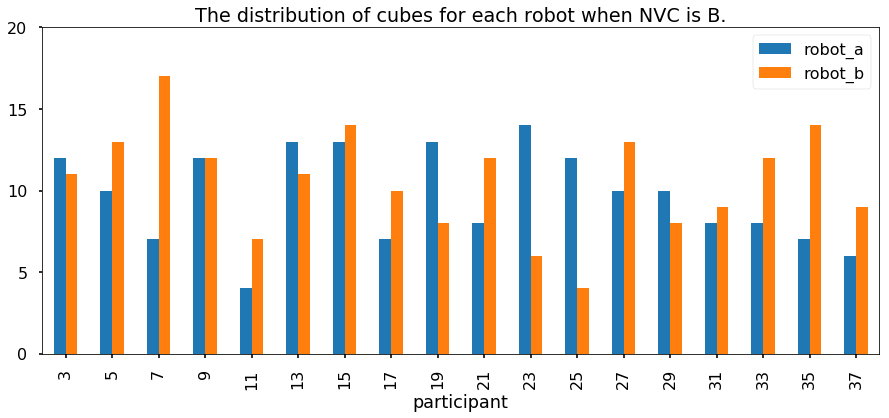

In [8]:
odd_cubes_per_participant_plot_data = odd_cubes_per_participant.drop(columns=['total_cubes'])
odd_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), 
                                         title="The distribution of cubes for each robot when NVC is B.", 
                                         yticks=range(0,25,5))

# Participants which had robotA as NVC

In [9]:
even_cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
2,8,8,16
6,1,17,18
8,10,12,22
10,8,15,23
12,9,3,12


In [10]:
even_cubes_per_participant.sum()

robot_a        136
robot_b        175
total_cubes    311
dtype: int64

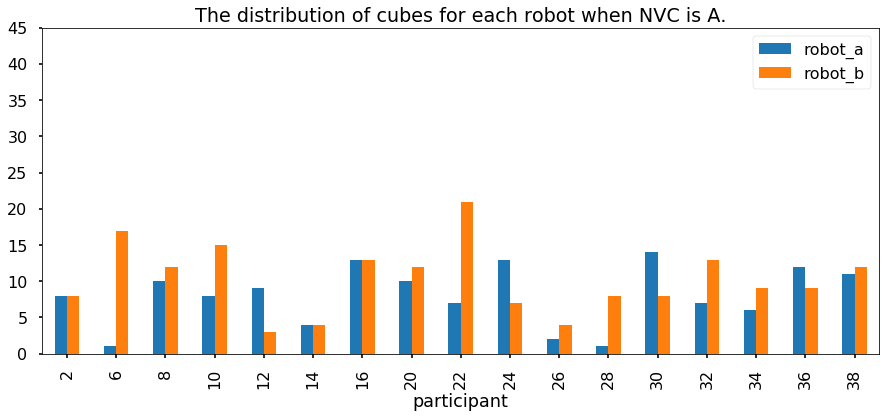

In [11]:
even_cubes_per_participant_plot_data = even_cubes_per_participant.drop(columns=['total_cubes'])
even_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot when NVC is A.", yticks=range(0,50,5))

# NVC-B group by scene

In [12]:
odd_participants_by_scene = odd_participants_data.groupby("scene").sum().drop(columns=['participant', 'NVC_A', 'NVC_B'])
odd_participants_by_scene

,robot_a,robot_b
scene,,
1,28,35
2,38,48
3,58,51
4,50,56


In [13]:
temp = odd_participants_by_scene
temp['robot a mean'] = odd_participants_by_scene['robot_a']/len(odd_participants_by_scene)
temp['robot b mean'] = odd_participants_by_scene['robot_b']/len(odd_participants_by_scene)
temp

,robot_a,robot_b,robot a mean,robot b mean
scene,,,,
1,28,35,7.0,8.75
2,38,48,9.5,12.00
3,58,51,14.5,12.75
4,50,56,12.5,14.00


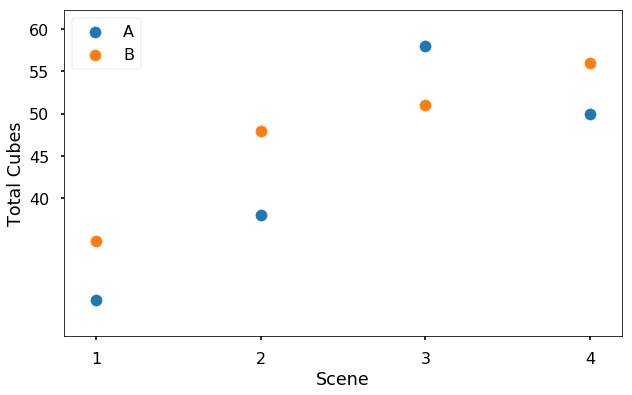

In [14]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(40,150,5))
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_a"], label="A")
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

# NVC-A group by scene

In [15]:
even_participants_by_scene = even_participants_data.groupby("scene").sum().drop(columns=['participant']).drop(columns=['NVC_A']).drop(columns=['NVC_B'])
even_participants_by_scene

,robot_a,robot_b
scene,,
1,32,19
2,26,49
3,39,48
4,39,59


In [16]:
temp = even_participants_by_scene
temp['robot a mean'] = even_participants_by_scene['robot_a']/len(even_participants_by_scene)
temp['robot b mean'] = even_participants_by_scene['robot_b']/len(even_participants_by_scene)
temp

,robot_a,robot_b,robot a mean,robot b mean
scene,,,,
1,32,19,8.00,4.75
2,26,49,6.50,12.25
3,39,48,9.75,12.00
4,39,59,9.75,14.75


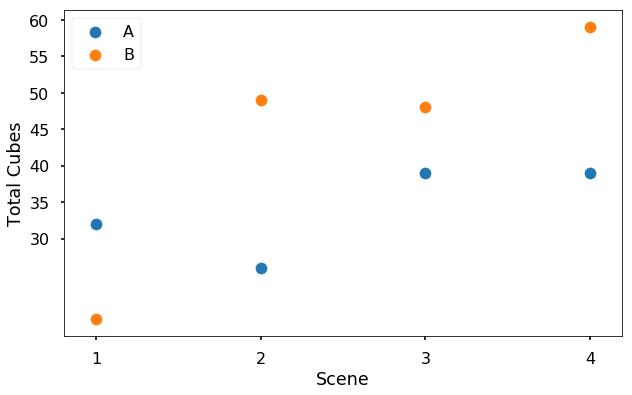

In [17]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(30,150,5))
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_a"], label="A")
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

Text(0,0.5,'total cubes')

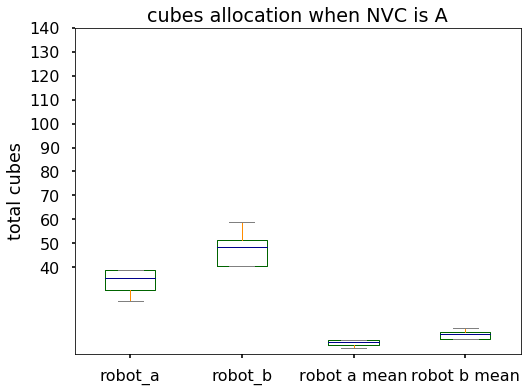

In [18]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
ax = even_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6), yticks=range(40,150,10),
                                    title = "cubes allocation when NVC is A")
ax.set_ylabel("total cubes")

Text(0,0.5,'total cubes ')

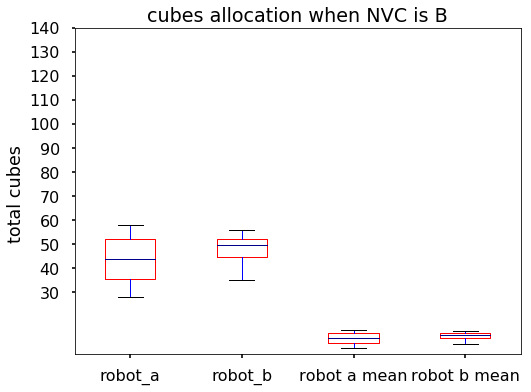

In [19]:
color = {'boxes': 'Red', 'whiskers': 'Blue','medians': 'DarkBlue', 'caps': 'Black'}
ax = odd_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6),yticks=range(30,150,10),
                                    title = "cubes allocation when NVC is B")
ax.set_ylabel("total cubes ")

In [20]:
odd_participants_data.groupby(["participant", "scene"]).sum().head()

robot_a  robot_b  NVC_A  NVC_B
participant scene                                
3           1            1        2  False   True
            2            3        3  False   True
            3            4        3  False   True
            4            4        3  False   True
5           1            3        2  False   True

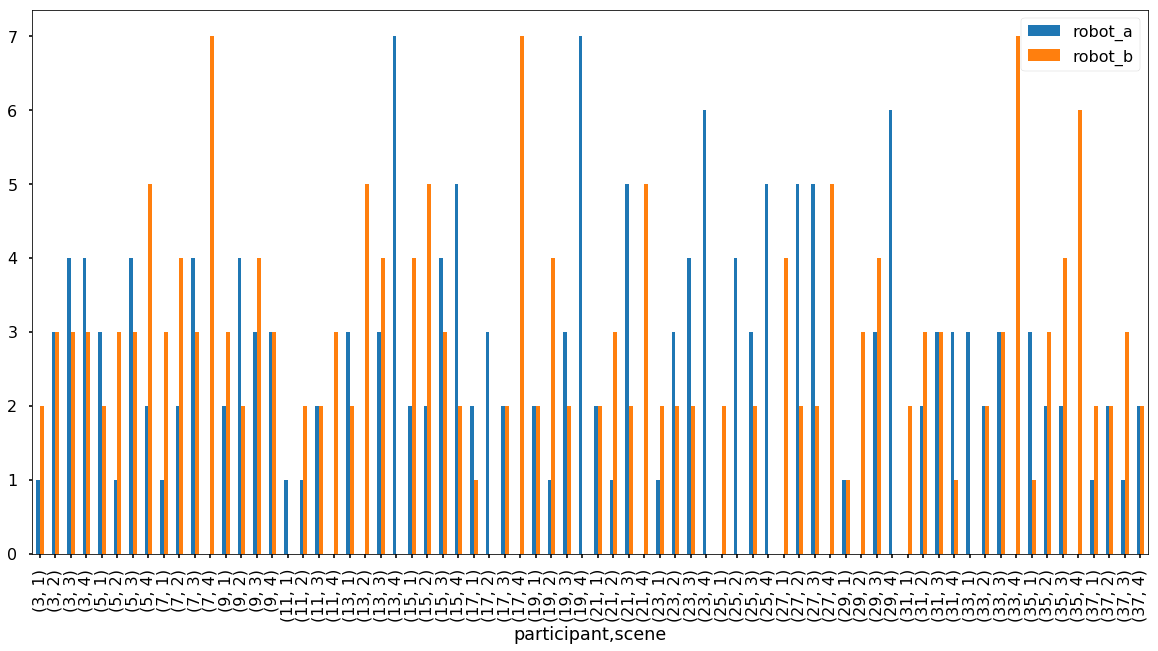

In [21]:
odd_participants_data.groupby(["participant", "scene"]).sum().drop(columns=['NVC_A','NVC_B']).plot(kind='bar', figsize=(20,10), by='participant')

In [22]:
even_participants_data.groupby(["participant", "scene"]).sum().head()

robot_a  robot_b  NVC_A  NVC_B
participant scene                                
2           1            2        1   True  False
            2            2        2   True  False
            3            0        3   True  False
            4            4        2   True  False
6           1            0        0   True  False

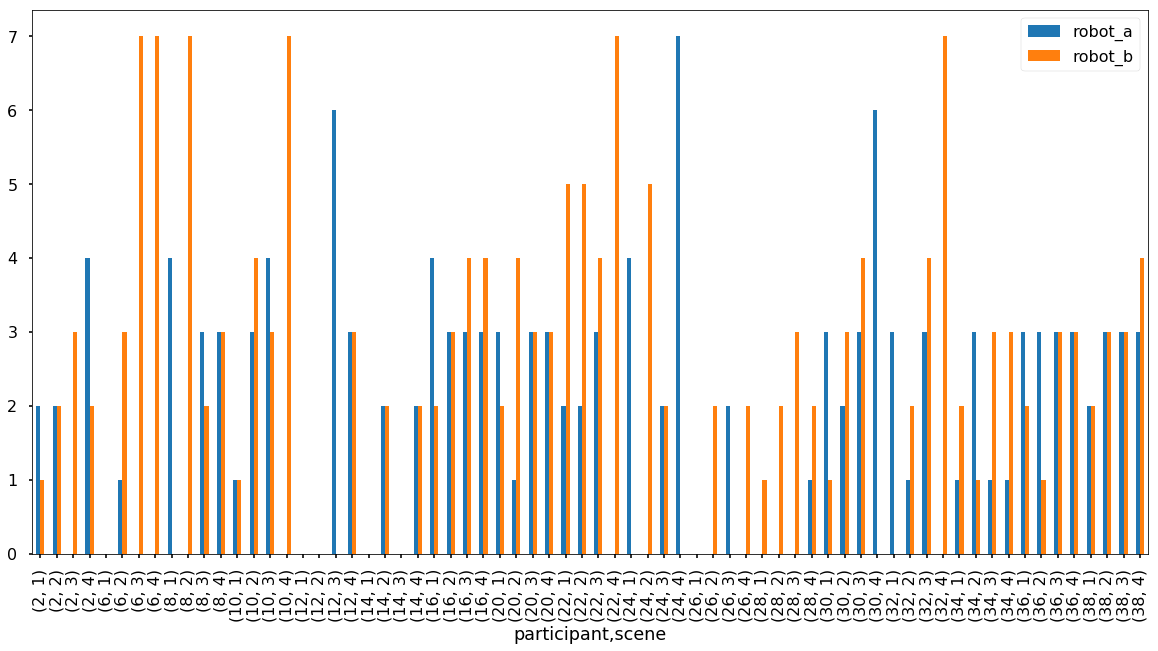

In [23]:
even_participants_data.groupby(["participant", "scene"]).sum().drop(columns=['NVC_A','NVC_B']).plot(kind='bar', figsize=(20,10))

# Separating data scene wise for participants where NVC is B

In [24]:
#odds_scene_0 = odd_participants_data[(odd_participants_data["scene"] == 0)]
odds_scene_1 = odd_participants_data[(odd_participants_data["scene"] == 1)]
odds_scene_2 = odd_participants_data[(odd_participants_data["scene"] == 2)]
odds_scene_3 = odd_participants_data[(odd_participants_data["scene"] == 3)]
odds_scene_4 = odd_participants_data[(odd_participants_data["scene"] == 4)]

# Cubes when NVC is B (scene 1 and 2)

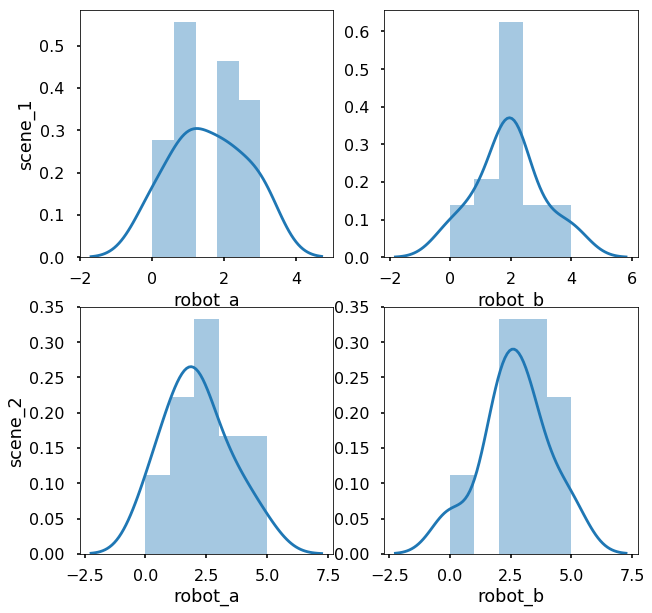

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(odds_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is B (scene 3 and 4)

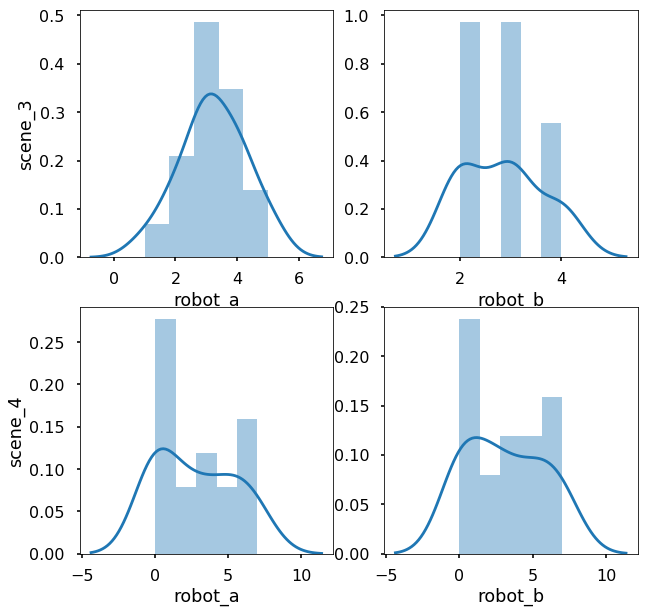

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(odds_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [27]:
stats.normaltest(odds_scene_1["robot_a"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.676068266257036, pvalue=0.43256004359334255)

In [28]:
stats.normaltest(odds_scene_1["robot_b"])

NormaltestResult(statistic=0.24895585941683374, pvalue=0.8829577482863067)

In [29]:
stats.normaltest(odds_scene_2["robot_a"])

NormaltestResult(statistic=0.6080872437427417, pvalue=0.737828680280801)

In [30]:
stats.normaltest(odds_scene_2["robot_b"])

NormaltestResult(statistic=0.5595166470409785, pvalue=0.7559664186831375)

In [31]:
stats.normaltest(odds_scene_3["robot_a"])

NormaltestResult(statistic=0.11837477997195255, pvalue=0.9425301318993912)

In [32]:
stats.normaltest(odds_scene_3["robot_b"])

NormaltestResult(statistic=3.163891552950298, pvalue=0.20557470636716435)

In [33]:
stats.normaltest(odds_scene_4["robot_a"])

NormaltestResult(statistic=5.844713506026399, pvalue=0.053806728584230065)

In [34]:
stats.normaltest(odds_scene_4["robot_b"])

NormaltestResult(statistic=4.866951370160504, pvalue=0.08773137542080627)

# Wilcoxon Test

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [35]:
stats.wilcoxon(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

WilcoxonResult(statistic=43.0, pvalue=0.3239172198439002)

Scene 2

In [36]:
stats.wilcoxon(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

WilcoxonResult(statistic=45.0, pvalue=0.3903970680084392)

Scene 3

In [37]:
stats.wilcoxon(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

WilcoxonResult(statistic=37.0, pvalue=0.31516078104996914)

scene 4

In [38]:
stats.wilcoxon(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

WilcoxonResult(statistic=62.0, pvalue=0.7550974108110085)

# Conclusion

### For scene 1,2, and 4 p-value > 0.05, accept h0

### For scene 3 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [39]:
stats.ttest_rel(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

Ttest_relResult(statistic=-0.9593966796639835, pvalue=0.350806331168509)

Scene 2

In [40]:
stats.ttest_rel(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

Ttest_relResult(statistic=-0.9696728761420852, pvalue=0.34580442147424606)

Scene 3

In [41]:
stats.ttest_rel(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

Ttest_relResult(statistic=1.1294471400939765, pvalue=0.27439494582898083)

Scene 4

In [42]:
stats.ttest_rel(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

Ttest_relResult(statistic=-0.272462488904917, pvalue=0.7885482009513115)

### Conclusion
#### Scene 1, 2, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 3 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating data scene wise for participants where NVC is A

In [43]:
#evens_scene_0 = even_participants_data[(even_participants_data["scene"] == 0)]
evens_scene_1 = even_participants_data[(even_participants_data["scene"] == 1)]
evens_scene_2 = even_participants_data[(even_participants_data["scene"] == 2)]
evens_scene_3 = even_participants_data[(even_participants_data["scene"] == 3)]
evens_scene_4 = even_participants_data[(even_participants_data["scene"] == 4)]

# Cubes when NVC is A (scene 1 and 2)

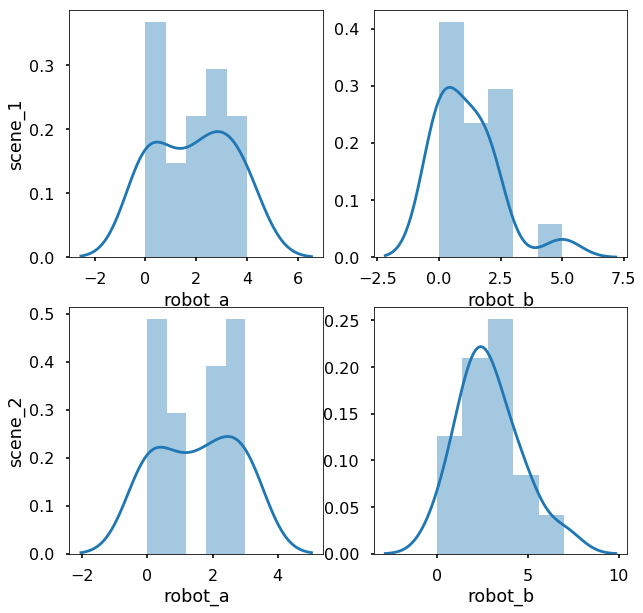

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(evens_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is A (scene 3 and 4)

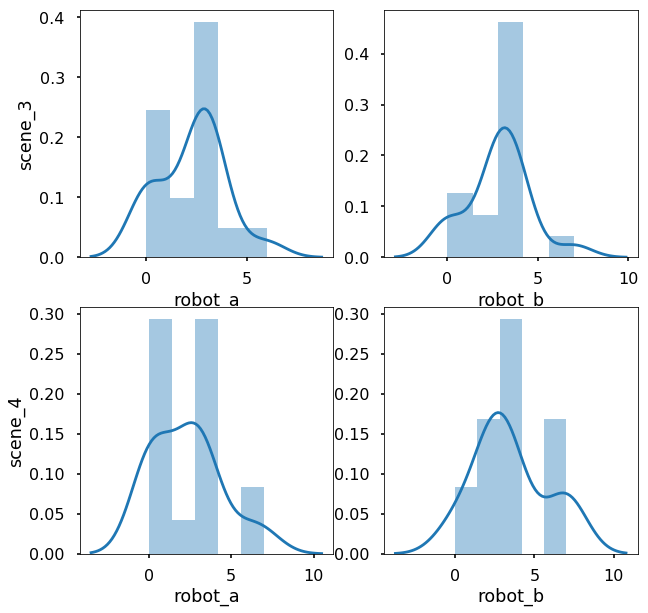

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(evens_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [46]:
stats.normaltest(evens_scene_1["robot_a"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=5.200904896305853, pvalue=0.07423998087216041)

In [47]:
stats.normaltest(evens_scene_1["robot_b"])

NormaltestResult(statistic=12.826911271438856, pvalue=0.00163934970730073)

In [48]:
stats.normaltest(evens_scene_2["robot_a"])

NormaltestResult(statistic=6.685062531292065, pvalue=0.03534737079990089)

In [49]:
stats.normaltest(evens_scene_2["robot_b"])

NormaltestResult(statistic=2.442951243247638, pvalue=0.2947948401734729)

In [50]:
stats.normaltest(evens_scene_3["robot_a"])

NormaltestResult(statistic=0.23479052604617023, pvalue=0.8892336425127333)

In [51]:
stats.normaltest(evens_scene_3["robot_b"])

NormaltestResult(statistic=1.7299673726538207, pvalue=0.42105842158073326)

In [52]:
stats.normaltest(evens_scene_4["robot_a"])

NormaltestResult(statistic=1.9850318750579143, pvalue=0.37064300232395175)

In [53]:
stats.normaltest(evens_scene_4["robot_b"])

NormaltestResult(statistic=1.0180122038526107, pvalue=0.6010927069043845)

# Wilcoxon Test when NVC A

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [54]:
stats.wilcoxon(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

WilcoxonResult(statistic=14.5, pvalue=0.09613903570317667)

Scene 2

In [55]:
stats.wilcoxon(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

WilcoxonResult(statistic=12.0, pvalue=0.03245845778845387)

Scene 3

In [56]:
stats.wilcoxon(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

WilcoxonResult(statistic=25.5, pvalue=0.2826311546427065)

Scene 4

In [57]:
stats.wilcoxon(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

WilcoxonResult(statistic=22.0, pvalue=0.1775980210573902)

# Conclusion

### For scene 1,3, and 4 p-value > 0.05, accept h0

### For scene 2 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [58]:
stats.ttest_rel(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

Ttest_relResult(statistic=1.7314106113512697, pvalue=0.10261152888833616)

Scene 2

In [59]:
stats.ttest_rel(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

Ttest_relResult(statistic=-2.43628485012893, pvalue=0.026900553882145718)

Scene 3

In [60]:
stats.ttest_rel(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

Ttest_relResult(statistic=-0.8241633836921342, pvalue=0.4219632128970361)

Scene 4

In [61]:
stats.ttest_rel(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

Ttest_relResult(statistic=-1.1754541987684668, pvalue=0.25700887911267123)

### Conclusion
#### Scene 1, 3, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 2 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating the data for eye color

In [62]:
swap_heads_id = 26

In [63]:
def separate_red_yellow_eyes_data(data, swap_heads_id):
    red_eye_on_A = data[data['participant'] <= swap_heads_id]
    yellow_eye_on_A = data[data['participant'] > swap_heads_id]
    
    return red_eye_on_A, yellow_eye_on_A

# Separating data for NVC and non NVCs

In [64]:
## separates nv and non nvc data with scene number > scene_num
def separate_NVC_nonNVC(data, scene_num):
    odd_participants_data = data[data["participant"] % 2 != 0]
    odd_participants_data = odd_participants_data[odd_participants_data["scene"] > scene_num]
    
    even_participants_data = data[data["participant"] % 2 == 0]
    even_participants_data = even_participants_data[even_participants_data["scene"] > scene_num]
    
    return even_participants_data, odd_participants_data

In [126]:
red, yellow = separate_red_yellow_eyes_data(raw_data, swap_heads_id)

In [127]:
even_data, odd_data = separate_NVC_nonNVC(yellow, 0)

In [107]:
## takes a list of colums to be dropped and return clean data
def drop_colums(data, column_list):
    clean_data = data.drop(columns=column_list)
    return clean_data

In [108]:
## takes a list of column names and group them
def group_data(data, group_list):
    groupped_data = data.groupby(group_list).sum()
    return groupped_data

# Separating data scene wise

In [109]:
def separate_data_scene_wise(data):
    data_1 = data[(data["scene"] == 1)]
    data_2 = data[(data["scene"] == 2)]
    data_3 = data[(data["scene"] == 3)]
    data_4 = data[(data["scene"] == 4)]
    
    return data_1, data_2, data_3, data_4

In [110]:
#takes data and list of column names
#wilcoxon_test(red_eye, ['robot_a', 'robot_b'])
def wilcoxon_test(data, column_names):
    return stats.wilcoxon(data[column_names[0]], data[column_names[1]])

In [111]:
#takes data and list of column names
#pair_t_test(red_eye, ['robot_a', 'robot_b'])
def pair_t_test(data, column_names):
    return stats.ttest_rel(data[column_names[0]], data[column_names[1]])

In [112]:
y_s1, y_s2, y_s3, y_s4 = separate_data_scene_wise(yellow)

In [113]:
cols=['robot_a', 'robot_b']
print(wilcoxon_test(y_s1, cols))
print(wilcoxon_test(y_s2, cols))
print(wilcoxon_test(y_s3, cols))
print(wilcoxon_test(y_s4, cols))

WilcoxonResult(statistic=23.5, pvalue=0.6805241314625727)
WilcoxonResult(statistic=20.5, pvalue=0.8102371601294199)
WilcoxonResult(statistic=7.5, pvalue=0.13707189947201104)
WilcoxonResult(statistic=17.5, pvalue=0.3058544659912311)


/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [114]:
print(pair_t_test(y_s1, cols))
print(pair_t_test(y_s2, cols))
print(pair_t_test(y_s3, cols))
print(pair_t_test(y_s4, cols))

Ttest_relResult(statistic=0.2717084896643914, pvalue=0.7908780167894327)
Ttest_relResult(statistic=-0.33001650123760307, pvalue=0.7475870246614904)
Ttest_relResult(statistic=-1.6818357317441643, pvalue=0.12073832762303512)
Ttest_relResult(statistic=-0.963332237016462, pvalue=0.3560805730034192)


In [115]:
r_s1, r_s2, r_s3, r_s4 = separate_data_scene_wise(red)

In [116]:
print(wilcoxon_test(r_s1, cols))
print(wilcoxon_test(r_s2, cols))
print(wilcoxon_test(r_s3, cols))
print(wilcoxon_test(r_s4, cols))

WilcoxonResult(statistic=63.5, pvalue=0.811914405660123)
WilcoxonResult(statistic=35.5, pvalue=0.0282949662902311)
WilcoxonResult(statistic=59.5, pvalue=0.24076975253916344)
WilcoxonResult(statistic=73.0, pvalue=0.5820803777072359)


In [117]:
print(pair_t_test(r_s1, cols))
print(pair_t_test(r_s2, cols))
print(pair_t_test(r_s3, cols))
print(pair_t_test(r_s4, cols))

Ttest_relResult(statistic=0.4841014298754515, pvalue=0.6330980847845312)
Ttest_relResult(statistic=-2.515937224924438, pvalue=0.019669662008125373)
Ttest_relResult(statistic=0.6227116380578268, pvalue=0.5398757964763893)
Ttest_relResult(statistic=-0.47650352823349545, pvalue=0.6384142851673426)


In [128]:
yellow = drop_colums(yellow, ['NVC_A','NVC_B', 'NVC'])

In [129]:
yellow = yellow[yellow['scene'] > 0]

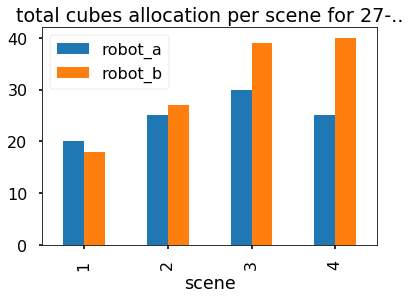

In [131]:
yellow.groupby("scene").sum().drop(columns=['participant']).plot(kind='bar', title = "total cubes allocation per scene for 27-..")

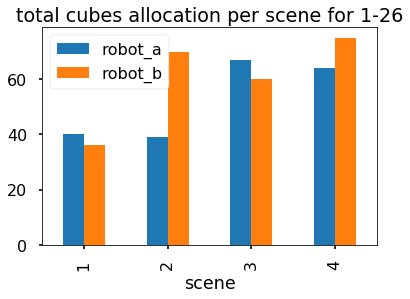

In [132]:
red = drop_colums(red, ['NVC_A','NVC_B', 'NVC'])
red = red[red['scene'] > 0]
red.groupby("scene").sum().drop(columns=['participant']).plot(kind='bar', title = "total cubes allocation per scene for 1-26")